# Soccer Predictions Using Machine Learning

## 1) Introduction

Sports betting is predicted become a multi-billion dollar industry in the United States. Countries around the world have already legalized sports betting and it have set standards and practices. Similar laws are now being passed in Congress that will allow for sports betting around the country. Multiple companies already exist in the two states where sports betting is legal, Nevada and New Jersey, and they are waiting to become a national presence. 

The data sets contains match data for the past years of Premier League Soccer that is played in the United Kingdom. It is one of the largest and most respected soccer leagues in the world. The games are closely watched by fans around the world and there are hundreds of different types of bets to be placed on large matches like all of the Premier League matches are. 

I downloaded the data sets from https://www.footystats.org which provides csv files for years of Premier League data. They only provide a few features of pre-match data, which is something that can be improved in the future. Lastly, soccer teams sometimes go on losing stretches and winning stretches which is not a feature that is part of the data set (how many wins in a row, how many losses in a row, avg goals/match in past 5 matches, etc.). These are all features that can be added that can help make the models more accurate. 

I will be creating a machine learning models that predicts match outcomes. 

## 2) Reading and Cleaning Data

In [231]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets

In [232]:
df1 = pd.read_csv('england-premier-league-matches-2012-to-2013-stats.csv')
df2 = pd.read_csv('england-premier-league-matches-2013-to-2014-stats.csv')
df3 = pd.read_csv('england-premier-league-matches-2014-to-2015-stats.csv')
df4 = pd.read_csv('england-premier-league-matches-2015-to-2016-stats.csv')
df5 = pd.read_csv('england-premier-league-matches-2016-to-2017-stats.csv')
df6 = pd.read_csv('england-premier-league-matches-2017-to-2018-stats.csv')
df7 = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
df8 = pd.read_csv('england-premier-league-matches-2019-to-2020-stats.csv')

In [233]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 147
Data columns (total 54 columns):
timestamp                              2808 non-null int64
date_GMT                               2808 non-null object
status                                 2808 non-null object
attendance                             2795 non-null float64
home_team_name                         2808 non-null object
away_team_name                         2808 non-null object
Pre-Match PPG (Home)                   2808 non-null float64
Pre-Match PPG (Away)                   2808 non-null float64
home_ppg                               2808 non-null float64
away_ppg                               2808 non-null float64
home_team_goal_count                   2808 non-null int64
away_team_goal_count                   2808 non-null int64
total_goal_count                       2808 non-null int64
total_goals_at_half_time               2808 non-null int64
home_team_goal_count_half_time         2808 non-null i

Combining the years of match data into one data frame. Now looking at the column names. Will delete what is not ncessary for this as it is memory usage. 

In [234]:
df.drop(['timestamp', 'date_GMT', 'status', 'attendance', 'home_ppg', 'away_ppg', 'home_team_goal_timings', 'away_team_goal_timings', 'away_team_corner_count', 'home_team_corner_count',
        'away_team_corner_count', 'home_team_corner_count', 'home_team_yellow_cards', 'away_team_yellow_cards', 'home_team_red_cards', 'away_team_red_cards',
        'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 'away_team_shots_off_target',
        'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession', 'over_15_HT_FHG_percentage_pre_match', 'over_05_HT_FHG_percentage_pre_match',
        'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'stadium_name', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time'], axis = 1, inplace=True)

In [235]:
df.tail()

,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,average_goals_per_match_pre_match,btts_percentage_pre_match,...,over_45_percentage_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
143,Wolverhampton Wanderers,West Ham United,1.43,1.29,2,0,2,1,2.58,65,...,7,1.80,3.85,4.75,1.26,1.83,3.1,5.85,1.74,1.95
144,Manchester United,Tottenham Hotspur,1.71,0.86,2,1,3,2,3.15,79,...,7,2.55,3.40,2.90,1.27,1.87,3.2,6.10,1.65,2.10
145,Chelsea,Aston Villa,1.57,0.57,2,1,3,2,2.93,57,...,15,1.36,5.75,8.25,1.11,1.40,2.0,3.25,1.59,2.15
146,Southampton,Norwich City,0.57,0.57,2,1,3,2,3.14,50,...,22,1.91,3.80,4.20,1.21,1.67,2.7,4.90,1.59,2.20
147,Liverpool,Everton,3.00,0.57,5,2,7,6,3.14,79,...,14,1.47,4.50,7.75,1.19,1.61,2.5,4.45,1.69,2.00


Now this is a bit cleaner. PPG stands for points per game, which is how the Premier League ranks teams. A win is 3 points, a draw is 1, and a loss is 0. Thus a average of 3.0 points per game is the max, so we see that Liverpool has a 3.0 PPG which shows us that they REALLY win a lot. 

In [236]:
df.isnull().sum()

home_team_name                       0
away_team_name                       0
Pre-Match PPG (Home)                 0
Pre-Match PPG (Away)                 0
home_team_goal_count                 0
away_team_goal_count                 0
total_goal_count                     0
total_goals_at_half_time             0
average_goals_per_match_pre_match    0
btts_percentage_pre_match            0
over_15_percentage_pre_match         0
over_25_percentage_pre_match         0
over_35_percentage_pre_match         0
over_45_percentage_pre_match         0
odds_ft_home_team_win                0
odds_ft_draw                         0
odds_ft_away_team_win                0
odds_ft_over15                       0
odds_ft_over25                       0
odds_ft_over35                       0
odds_ft_over45                       0
odds_btts_yes                        0
odds_btts_no                         0
dtype: int64

No null columns, data should be good. 

Now, funnily enough, the dataset does not actually show which team won the match. Going to have manually compute that.

In [237]:
df['outcome'] = 'temp'
for x in range(0,len(df)):
    if df['home_team_goal_count'].iloc[x] > df['away_team_goal_count'].iloc[x]:
        df['outcome'].iloc[x]= 'H'
    elif df['home_team_goal_count'].iloc[x]<df['away_team_goal_count'].iloc[x]:
        df['outcome'].iloc[x]= 'A'
    else:
        df['outcome'].iloc[x]= 'D'

/Users/jacob/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Reindexing. 

In [238]:
df.columns

Index(['home_team_name', 'away_team_name', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_team_goal_count', 'away_team_goal_count',
       'total_goal_count', 'total_goals_at_half_time',
       'average_goals_per_match_pre_match', 'btts_percentage_pre_match',
       'over_15_percentage_pre_match', 'over_25_percentage_pre_match',
       'over_35_percentage_pre_match', 'over_45_percentage_pre_match',
       'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win',
       'odds_ft_over15', 'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45',
       'odds_btts_yes', 'odds_btts_no', 'outcome'],
      dtype='object')

In [239]:
new_index= ['home_team_name', 'away_team_name', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'outcome', 'home_team_goal_count', 'away_team_goal_count',
       'total_goal_count', 'total_goals_at_half_time',
       'average_goals_per_match_pre_match', 'btts_percentage_pre_match',
       'over_15_percentage_pre_match', 'over_25_percentage_pre_match',
       'over_35_percentage_pre_match', 'over_45_percentage_pre_match',
       'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win',
       'odds_ft_over15', 'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45',
       'odds_btts_yes', 'odds_btts_no']
df.reindex(new_index, axis = 'columns')

,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),outcome,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,average_goals_per_match_pre_match,...,over_45_percentage_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
0,Arsenal,Sunderland,0.00,0.00,D,0,0,0,0,0.00,...,0,1.35,5.25,9.99,0.00,0.00,0.00,0.00,0.00,0.00
1,Fulham,Norwich City,0.00,0.00,H,5,0,5,2,0.00,...,0,1.90,3.67,4.51,0.00,0.00,0.00,0.00,0.00,0.00
2,Queens Park Rangers,Swansea City,0.00,0.00,A,0,5,5,1,0.00,...,0,2.35,3.42,3.31,0.00,0.00,0.00,0.00,0.00,0.00
3,Reading,Stoke City,0.00,0.00,D,1,1,2,1,0.00,...,0,2.62,3.31,2.97,0.00,0.00,0.00,0.00,0.00,0.00
4,West Bromwich Albion,Liverpool,0.00,0.00,H,3,0,3,1,0.00,...,0,3.93,3.51,2.08,0.00,0.00,0.00,0.00,0.00,0.00
5,West Ham United,Aston Villa,0.00,0.00,H,1,0,1,1,0.00,...,0,2.42,3.38,3.21,0.00,0.00,0.00,0.00,0.00,0.00
6,Newcastle United,Tottenham Hotspur,0.00,0.00,H,2,1,3,0,0.00,...,0,2.62,3.52,2.82,0.00,0.00,0.00,0.00,0.00,0.00
7,Wigan Athletic,Chelsea,0.00,0.00,A,0,2,2,2,0.00,...,0,7.58,4.44,1.51,0.00,0.00,0.00,0.00,0.00,0.00
8,Manchester City,Southampton,0.00,0.00,H,3,2,5,1,0.00,...,0,1.23,6.84,9.99,0.00,0.00,0.00,0.00,0.00,0.00
9,Everton,Manchester United,0.00,0.00,H,1,0,1,0,0.00,...,0,4.41,3.68,1.92,0.00,0.00,0.00,0.00,0.00,0.00


Note: that the "Pre-mate PPG" is 0.00 becuase this was a start to a season so they have not won or drawn any games yet. May be bad for the Machine Learning model, will be something to consider. 

## 3) Analysis

Before getting into any machine learning, let's look at few statistics. I want to see if we always home team what percentage bets will win.

### NOTE: High win rates do not mean profitable betting! 

Bookmakers set the odds that gives a "house edge" that varies game to game. If we calculate out the percentage chance of the following odds for the first row in the dataframe:

Odds | Chance of occuring
--- | --- 
Home:1.35 |	71.82% 
Draw:5.25 |	 18.47% 
Away:9.99  |   9.71% 
| Total percentage: 96.96 %

The house edge is therefore 3.04%. 

(https://www.bettingadvice.com/calculator.aspx used to convert as it has all the math built in to determine the house edge)

If you only win 50% of the time and the average odds of the bet is 1.5, then you actually lose money due to the house edge.

I contacted footystats.org about which sportsbook they get their odds from, and they replied with that they source from two sportsbooks: Bethesda and Bet365 and list the best odds for each between the two (higher the decimal, the higher the payout so intrinsicly one should go for the higher payout).

In [240]:
df['outcome'].value_counts()

H    1282
A     848
D     678
Name: outcome, dtype: int64

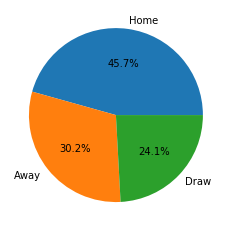

Average Home Team Win Odds: 2.8630769230769224
Average Draw Odds: 4.184316239316233
Average Away Win Odds: 4.628383190883183
Total games:  2808


In [241]:
labels = 'Home', 'Away', 'Draw'
sizes = [1282, 848, 678]

plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()
print("Average Home Team Win Odds:", df['odds_ft_home_team_win'].mean())
print("Average Draw Odds:", df['odds_ft_draw'].mean())
print("Average Away Win Odds:", df['odds_ft_away_team_win'].mean())

print("Total games: ", 1282 + 848 + 678)

So we see that home wins games around 45.7% of the time considering no other parameters with an average odds of 2.86! Wow! So statistically, if we bet home 100% of the time at the 2.86 odds, we would have a profit of 27%! But lets look a little deeper into this. Note that for soccer, for an perfect equal chance of a Win, Draw, or Loss, the odds for each is 3.0. This situation is where there is no "house edge" as shown before. Since it is under 3.0, we see that home always has higher odds to win on average (the lower the decimal, the higher the chance of occuring). 


In [242]:
count = 0
odds_array = []
for x in range(0,len(df)):
    if df['outcome'].iloc[x] == 'H':
        count += 1
        odds_array.append(df['odds_ft_home_team_win'].iloc[x])
print("The total number of times the average odds actually win:", count)
print("Which is this percentage of games:", count/2808)
print("Average odds when home does in fact win:", np.average(odds_array))

The total number of times the average odds actually win: 1282
Which is this percentage of games: 0.4565527065527066
Average odds when home does in fact win: 2.159602184087363


We see the average odds when home does win to be 2.15, significantly lower than the overall average of home odds.

This can be our benchmark for the machine learning algorithms. If we were to bet on home every game, using footystats.org betting data, we would win 46.7% of the time with an average odds of 2.15! 


## 3) Implementing  Machine Learning Models

In [252]:
X=df[['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)','odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']]
y=df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [244]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

Train Accuracy:  0.6438112199465716
Test Accuracy:  0.4501779359430605


So we can see here using knn machine learning, we can get an accuracy score of 48%! This uses a default value of number of neighbors to be 5. Let's try to optimize this because this may be overfitting/underfitting the model. Going to use GridSearchCV to do this to find best parameters.

In [245]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

/Users/jacob/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5505698005698005
{'n_neighbors': 21}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')


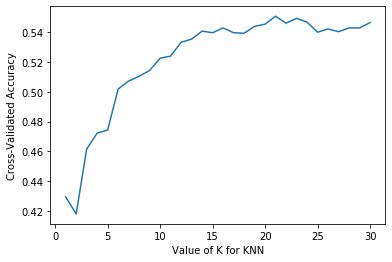

In [246]:
grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=False)
grid.fit(X, y)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy') 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [256]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)
knn_pred_train_2 = knn.predict(X_train)
knn_pred_test_2 = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train_2))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test_2))

Train Accuracy:  0.5805877114870882
Test Accuracy:  0.5373665480427047


This is what GridSearchCV optimized the knn model to be. This has a train accuracy of 52%! That is a higher than just our benchmark of just betting against home.

The average winning odds is 3.46 and with a higher win percentage, the model is picking really good bets! Let's try a different machine learning model.

In [254]:
here= tree.DecisionTreeClassifier(max_depth = 5)
here.fit(X_train, y_train)
dtree_pred_train_1 = here.predict(X_train)
dtree_pred_test_1 = here.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, dtree_pred_train_1))
print("Test Accuracy: ", accuracy_score(y_test, dtree_pred_test_1))

Train Accuracy:  0.5792520035618878
Test Accuracy:  0.5373665480427047


Here using a decision tree classifier, we see that it has an accuracy of 54% before an optimization!

In [ ]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(X, y)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(grid_mean_scores)
plt.xlabel('Value of Max Depth')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [257]:
model= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model.fit(X_train,y_train)
dtree_pred_train_2 = model.predict(X_train)
dtree_pred_test_2 = model.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, dtree_pred_train_2))
print("Test Accuracy: ", accuracy_score(y_test, dtree_pred_test_2))

Train Accuracy:  0.5703472840605521
Test Accuracy:  0.5391459074733096


Not a significant improvement. But now lets check the odds of the winning bets for each algorithm and see which one did better! 

In [260]:
df2 = X_test
df2['outcome'] = y_test
df2['predictions'] = knn_pred_test_2
odds_array2 = []
for x in range(0,len(df2)):
    if df2['outcome'].iloc[x] == 'H' and df2['predictions'].iloc[x] == 'H':
        odds_array2.append(df2['odds_ft_home_team_win'].iloc[x])
    if df2['outcome'].iloc[x] == 'D' and df2['predictions'].iloc[x] == 'D':
        odds_array2.append(df2['odds_ft_draw'].iloc[x])
    if df2['outcome'].iloc[x] == 'A' and df2['predictions'].iloc[x] == 'A':
        odds_array2.append(df2['odds_ft_away_team_win'].iloc[x])
print("Average winning odds for knn:", np.average(odds_array2))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test_2))

Average winning odds for knn: 1.9185761589403973
Test Accuracy:  0.5373665480427047


/Users/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [261]:
df3 = X_test
df3['outcome'] = y_test
df3['predictions'] = dtree_pred_test_2
odds_array3 = []
for x in range(0,len(df2)):
    if df3['outcome'].iloc[x] == 'H' and df3['predictions'].iloc[x] == 'H':
        odds_array3.append(df3['odds_ft_home_team_win'].iloc[x])
    if df3['outcome'].iloc[x] == 'D' and df3['predictions'].iloc[x] == 'D':
        odds_array3.append(df3['odds_ft_draw'].iloc[x])
    if df3['outcome'].iloc[x] == 'A' and df3['predictions'].iloc[x] == 'A':
        odds_array2.append(df3['odds_ft_away_team_win'].iloc[x])
print("Average winning odds for decision tree:", np.average(odds_array2))
print("Test Accuracy: ", accuracy_score(y_test, dtree_pred_test_2))

Average winning odds for decision tree: 1.9023857868020304
Test Accuracy:  0.5391459074733096


/Users/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The average odds were slightly higher with a even slighter less accurate model, but probably insignificant profits in the long run.

|        | kNN     | Decision Tree |
|------------------|---------|---------------|
| Avg Winning Odds | 1\.918  | 1\.902       |
| Win Percentage   | 53\.73% | 53\.91%       |

If this was to be automated, it would be profitable with either method! 

If we use kNN as an example and place 100 bets betting $100 on each, we can estimate 53 will win and will pay out an average of $191.80. 47 will lose and we will lose $100 on every bet. 

The total would be 53*191.80 + 47(-100) = $5,465 over 100 bets. 

The ROI would be 54%!!!

Furthermore I could look into other betting odds that offer different things such as bets are canceled when there is a draw. This would definitely increase the rate of successful bets, but the odds are lower. Bookmakers know this and account for that as well with adjusting the odds. 

There is always further features that I could add. There are mid season trades that could affect this model a lot. Also a team could have done really badly in the beginning of the season, but an injured player is back, then they do a lot better, but their average PPG in this model will still be low, even though they start winning... More features are needed that are related to last few games. Lastly I did not have home field advantage feature that I showed had a large effect. A full database of data would be needed and really benefical. This is something I'd like to continue working on as it is good experience with all things software development. I would have to web-scrape odds, set up a database pipeline to store it, and then keep updating data values. I would have to retrain models for each week probably as well. There are other machine learning tools that I did not touch yet that I could look into! The main problem with this in my mind is that draws and upsets are SUPER hard to predict.

Lastly, bookmakers also employ data scientists who are attempting the same things as I am as the books are trying to make the odds profitable for themselves. This makes it hard as we are battling their Machine Learning models and the house edge :(. 